## Purpose of analysis:

*Inspired by https://www.kaggle.com/code/artemburenok/stock-analysis-monte-carlo-build-portfolio*

* Build moving average of varios stocks 
* Determine correlations between stock returns 
* Create an optimal portfolio
* Try to predict the future behavior of the stocks 

*Using data https://www.kaggle.com/datasets/jacksoncrow/stock-market-dataset*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime
import os

In [8]:
# Four company for data extraction
stocks=True
company_list = ['CSCO', 'UNT', 'SBGI', 'UFCS', 'GFED', 'AIRT', 'SITC', 'NXN', 'TRNS', 'NTZ']

# Check enough dates

In [12]:
directory = '../data/stocks/'
files = os.listdir(directory)
i, cnt = 0, 0
company_list = []
while i < len(files) and cnt < 10:
    file = files[i]
    df = pd.read_csv(directory + file)
    if df.shape[0] > 6200:
        cnt += 1
        print(file[:-4])
        company_list.append(file[:-4])
    i += 1

CSCO
UNT
SBGI
UFCS


GFED
AIRT
SITC
NXN
TRNS
NTZ


In [16]:
#globals()- taking the string and makes it a global variable
companies = {}
for company in company_list:
    if stocks: dir_name='../data/stocks/'
    else: dir_name='../data/etfs/'
    fn = dir_name + company + '.csv'
    companies[company] = pd.read_csv(fn, index_col='Date', parse_dates=True)

In [26]:
#globals()- taking the string and makes it a global variable
dir_name = '../data/clean/'
companies = {}
for company in company_list:
    fn = dir_name + company + '.csv'
    companies[company] = pd.read_csv(fn, index_col='Date', parse_dates=True)

In [38]:
df = companies["TRNS"]

for company in company_list:
    df = companies[company]
    df_out = pd.DataFrame(columns=['Date', 'Return'])
    df_out = df['Return'].groupby(pd.Grouper(freq='M')).mean() 
    df_out +=1  
    

    df_out.to_csv('../data/clean/monthly/' + company + '.csv')
    print(df_out.head(5))

Date
1995-06-30    1.007288
1995-07-31    1.005326
1995-08-31    1.007565
1995-09-30    1.002787
1995-10-31    1.005766
Freq: M, Name: Return, dtype: float64
Date
1995-06-30    1.004903
1995-07-31    0.996728
1995-08-31    1.003755
1995-09-30    1.002250
1995-10-31    1.002257
Freq: M, Name: Return, dtype: float64
Date
1995-06-30    1.008952
1995-07-31    1.004563
1995-08-31    0.999767
1995-09-30    0.997715
1995-10-31    0.985792
Freq: M, Name: Return, dtype: float64
Date
1995-06-30    1.000863
1995-07-31    0.999737
1995-08-31    1.008617
1995-09-30    1.003352
1995-10-31    0.997440
Freq: M, Name: Return, dtype: float64
Date
1995-06-30    1.001105
1995-07-31    1.000423
1995-08-31    0.997048
1995-09-30    1.008439
1995-10-31    1.007131
Freq: M, Name: Return, dtype: float64
Date
1995-06-30    1.002574
1995-07-31    0.998861
1995-08-31    1.006134
1995-09-30    0.994615
1995-10-31    1.006143
Freq: M, Name: Return, dtype: float64
Date
1995-06-30    0.998641
1995-07-31    1.002802
1

In [15]:
companies["CSCO"].head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-02-16,0.0,0.079861,0.073785,0.077257,0.059806,940636800
1990-02-20,0.0,0.079861,0.074653,0.079861,0.061822,151862400
1990-02-21,0.0,0.078993,0.075521,0.078125,0.060478,70531200
1990-02-22,0.0,0.081597,0.078993,0.078993,0.061150,45216000
1990-02-23,0.0,0.079861,0.078125,0.078559,0.060814,44697600


In [22]:
companies["TRNS"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10674 entries, 1977-12-05 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10674 non-null  float64
 1   High       10674 non-null  float64
 2   Low        10674 non-null  float64
 3   Close      10674 non-null  float64
 4   Adj Close  10674 non-null  float64
 5   Volume     10674 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 583.7 KB


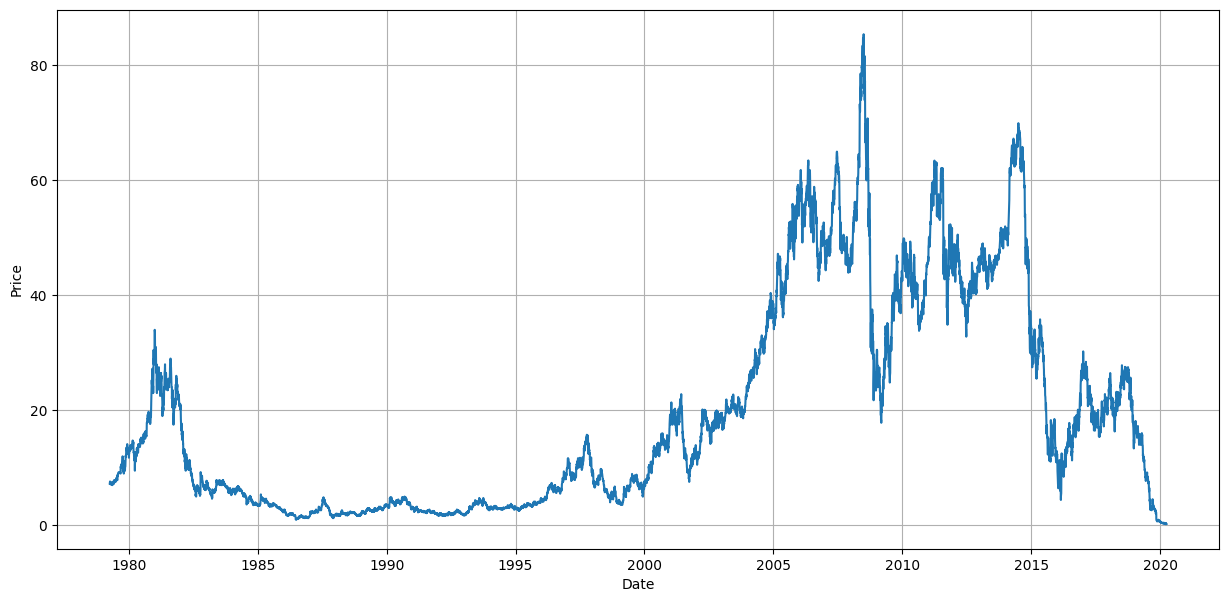

In [21]:
plt.figure(figsize=(15, 7))
plt.plot(companies["UNT"]['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

<AxesSubplot: xlabel='Date'>

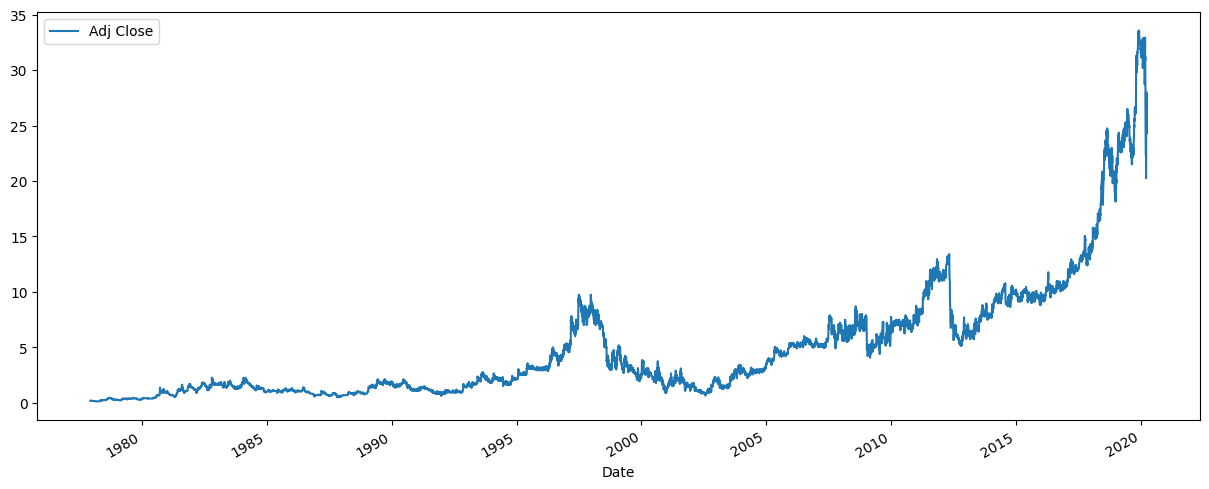

In [23]:
companies["TRNS"]['Adj Close'].plot(legend=True, figsize=(15, 6))

## Calculate monthly average

In [24]:
companies["TRNS"].head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1977-12-05,0.0000,0.28125,0.1875,0.1875,0.1875,31200
1977-12-06,0.1875,0.18750,0.1875,0.1875,0.1875,0
1977-12-07,0.1875,0.18750,0.1875,0.1875,0.1875,0
1977-12-08,0.1875,0.18750,0.1875,0.1875,0.1875,0
1977-12-09,0.1875,0.18750,0.1875,0.1875,0.1875,0


## Moving average

Moving average - function whose value at each point is equal to some average value of the original function for the previous period. 

Formula for calculations:

SUM = sum of prices for past x days; MA = SUM / x 

In [64]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    for company in company_list:
        companies[company][ma_str] = companies[company]['Adj Close'].rolling(ma).mean()
    

In [41]:
companies["MMM"][8:25]

,Open,High,Low,Close,Adj Close,Volume,MA: 10,MA: 20,MA: 30
Date,,,,,,,,,
1970-01-14,7.070312,7.171875,7.070312,7.140625,0.435360,377600,NaN,NaN,NaN
1970-01-15,7.109375,7.109375,7.000000,7.000000,0.426786,169600,0.427786,NaN,NaN
1970-01-16,7.000000,7.046875,6.828125,6.953125,0.423928,289600,0.428405,NaN,NaN
1970-01-19,6.875000,6.875000,6.781250,6.812500,0.415354,179200,0.427929,NaN,NaN
1970-01-20,6.812500,6.867188,6.781250,6.867188,0.418688,172800,0.427357,NaN,NaN
1970-01-21,6.867188,6.867188,6.804688,6.851562,0.417736,272000,0.426452,NaN,NaN
1970-01-22,6.851562,6.906250,6.835938,6.890625,0.420118,318400,0.425214,NaN,NaN
1970-01-23,6.890625,6.914062,6.820312,6.820312,0.415830,176000,0.423642,NaN,NaN
1970-01-26,6.820312,6.867188,6.750000,6.789062,0.413925,278400,0.421832,NaN,NaN


In [42]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

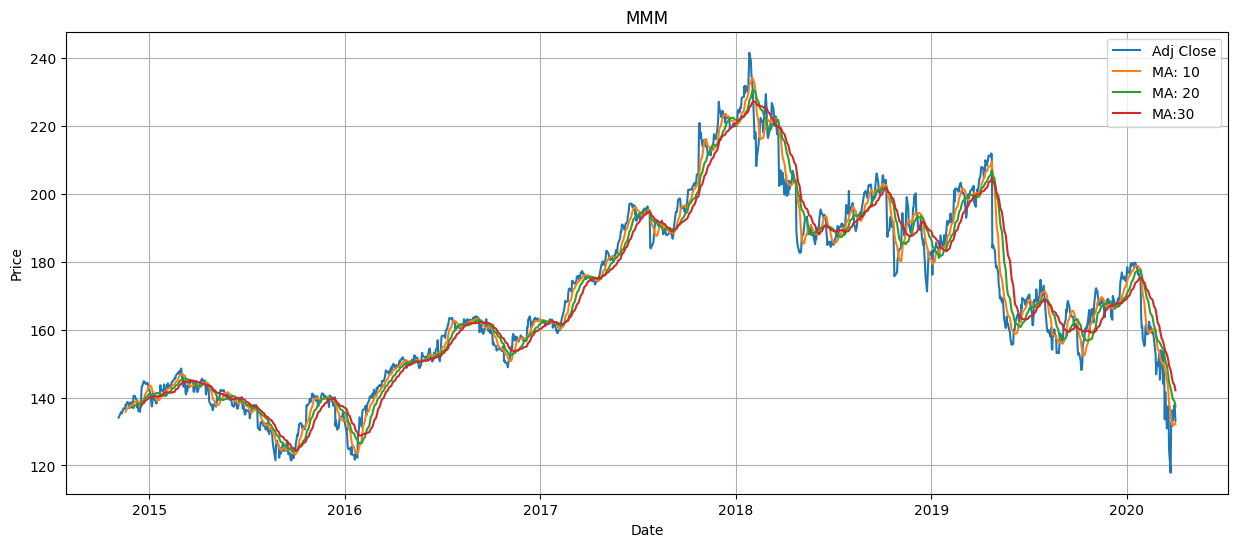

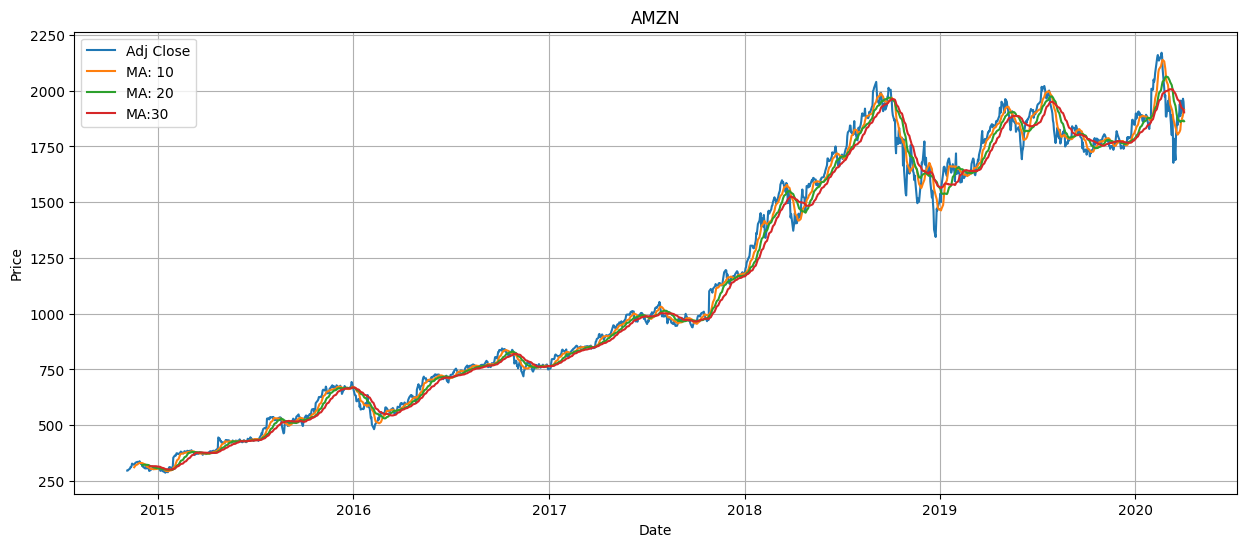

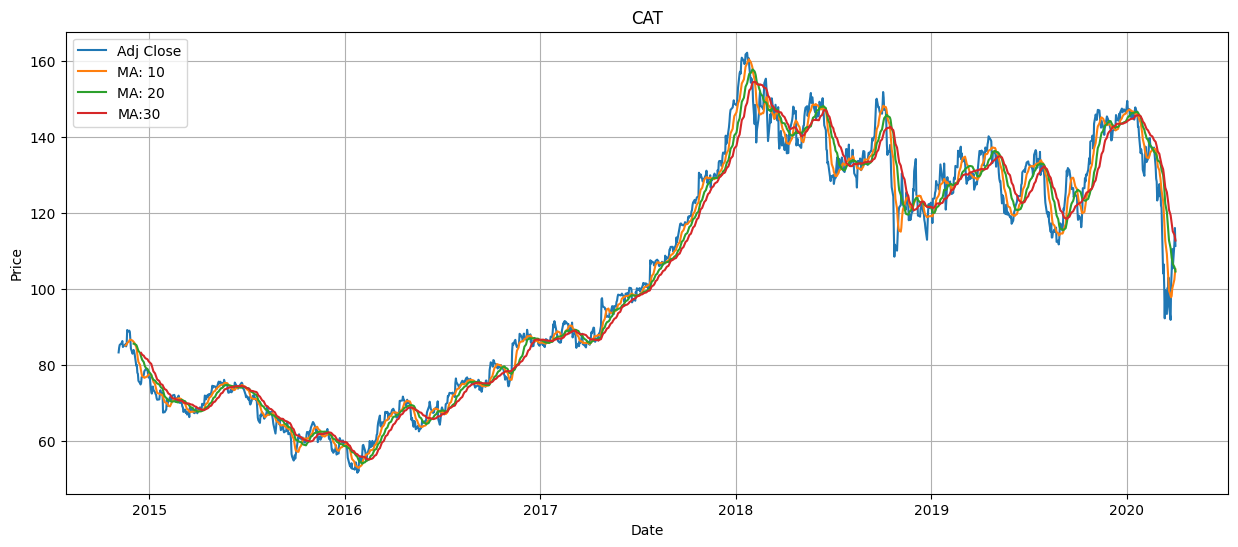

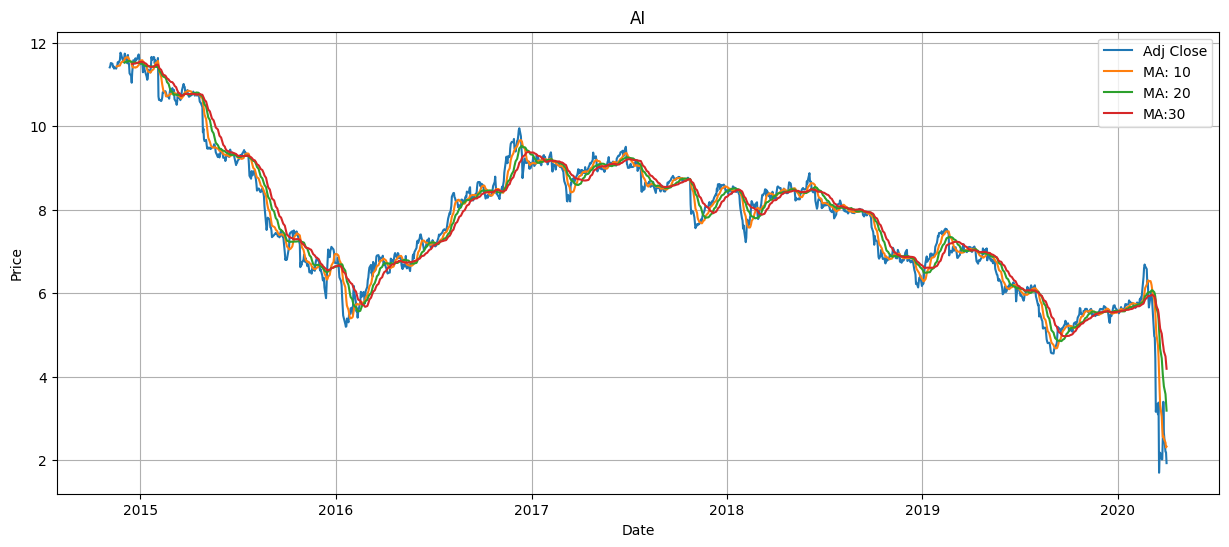

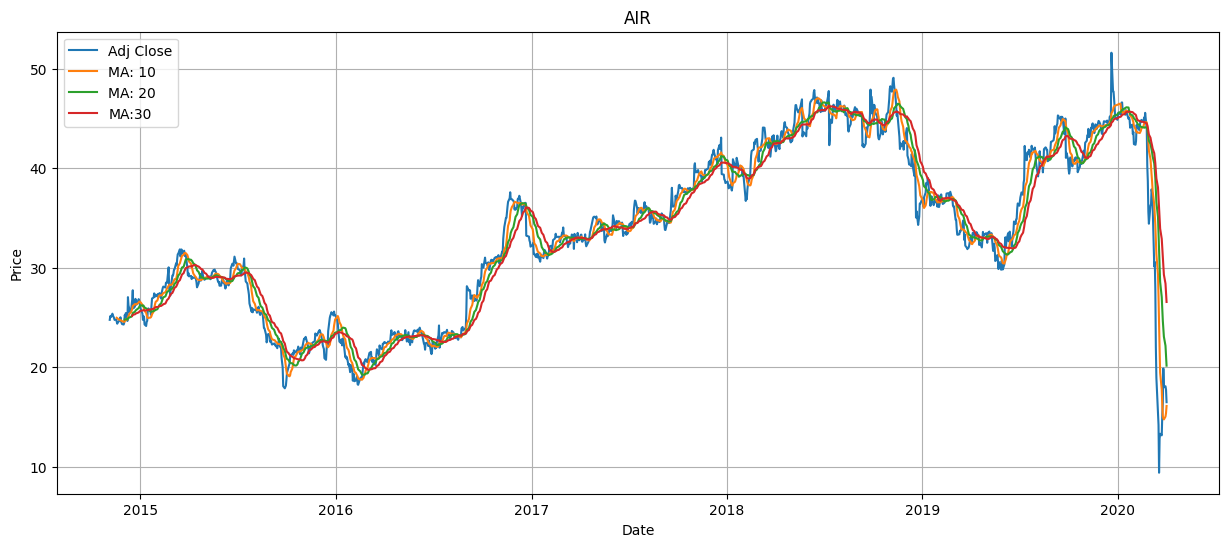

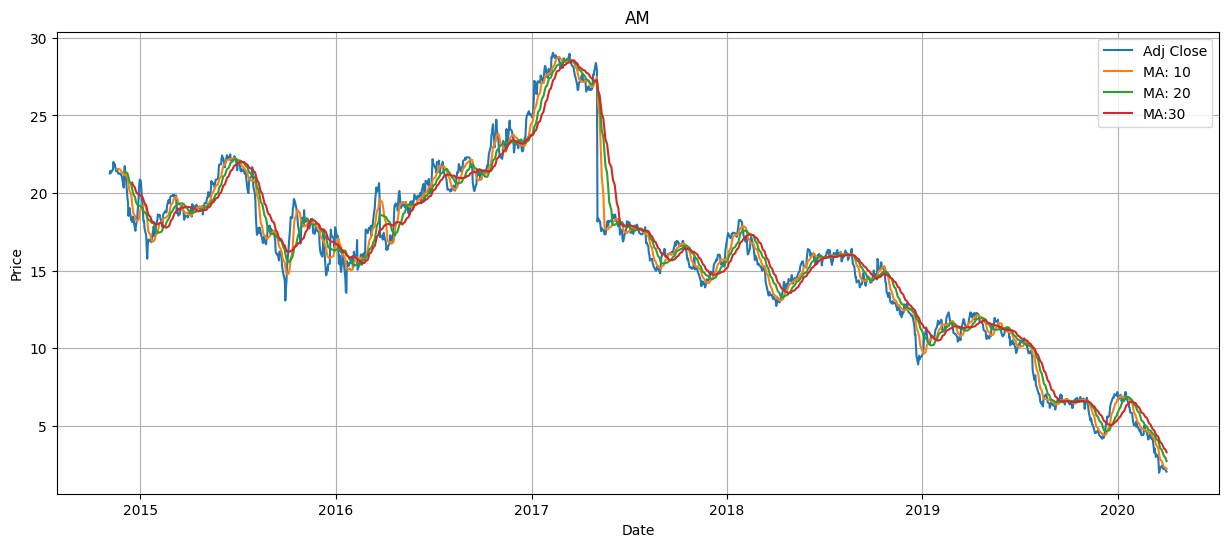

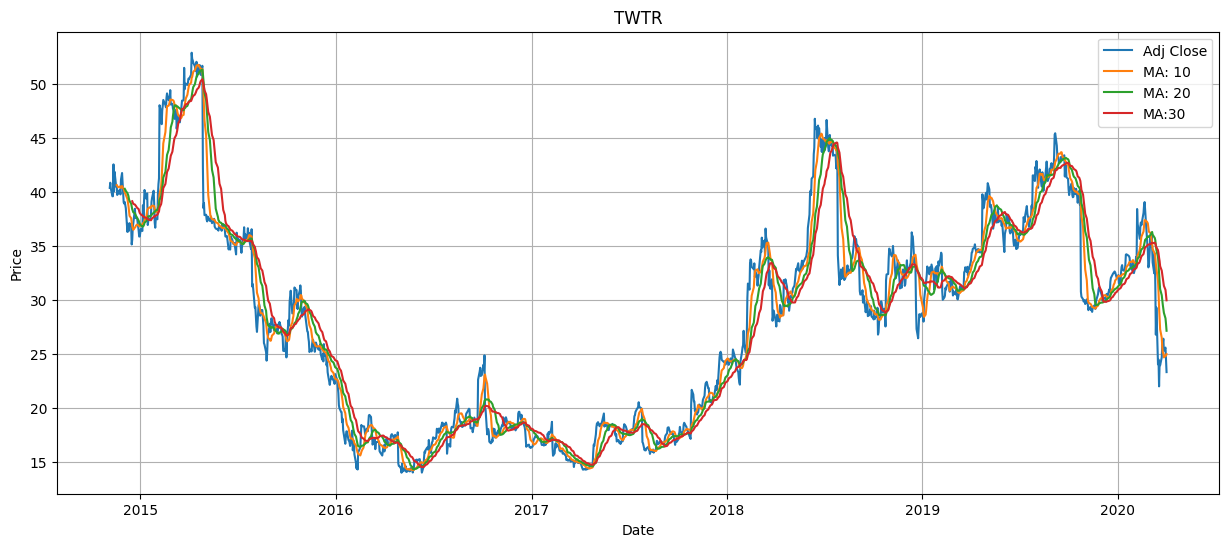

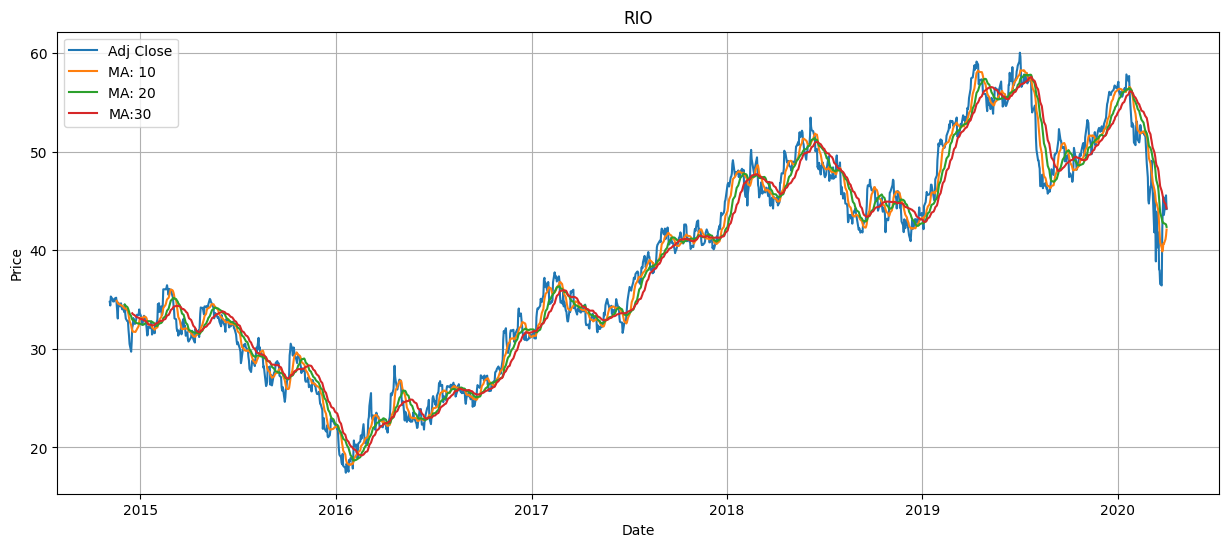

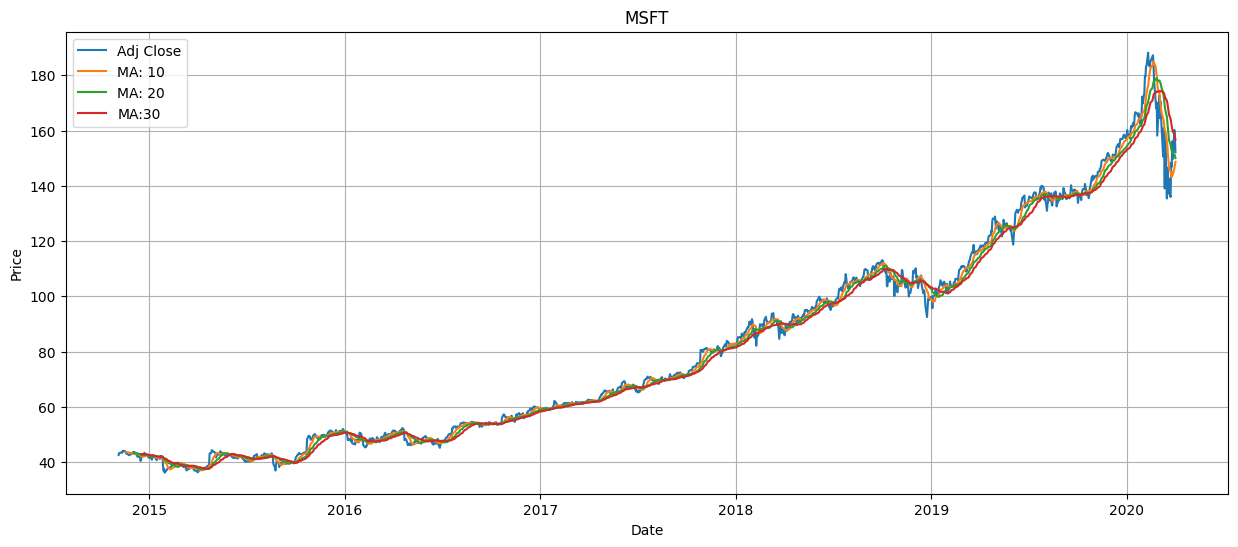

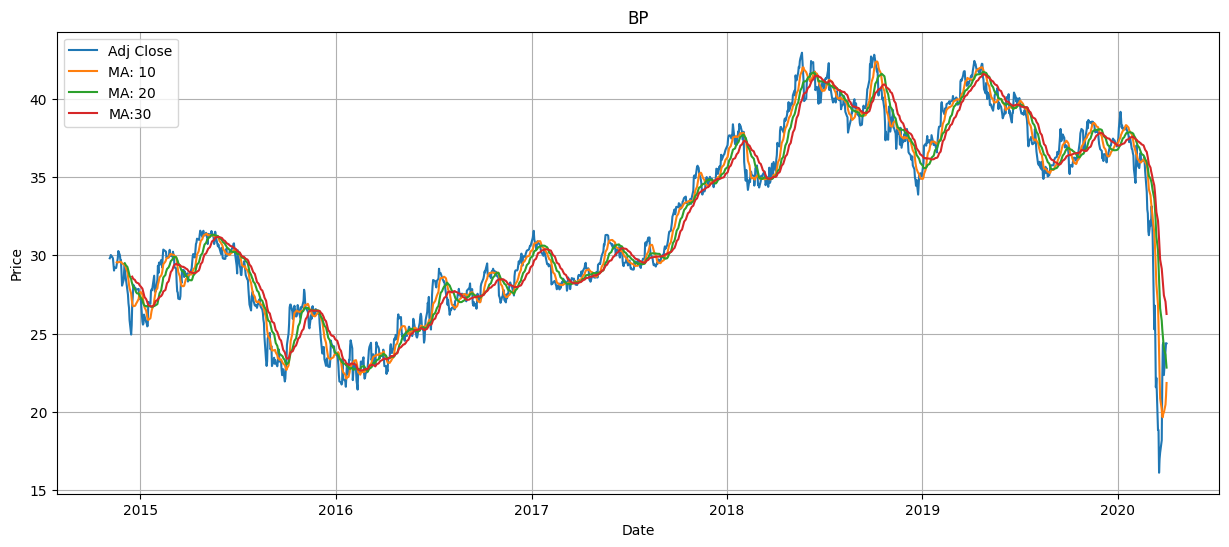

In [65]:
for company in company_list:   
    plot_graphic(companies[company], company)

If a long-term investment is being considered, then it is better to consider a smoother curve, since it is more resistant to sharp price jumps.

In [67]:
companies["MMM"].loc[:, 'Return'].mean()

9.567247006233339e-05

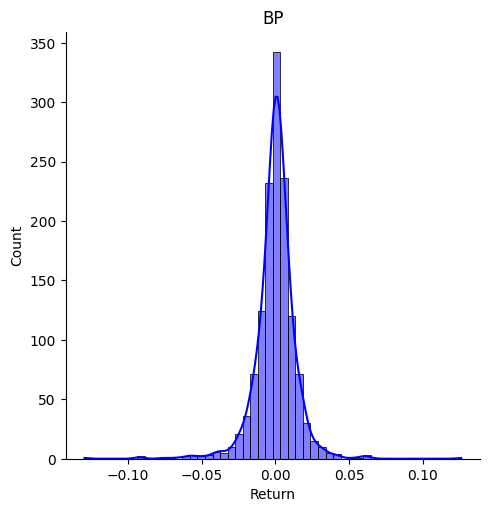

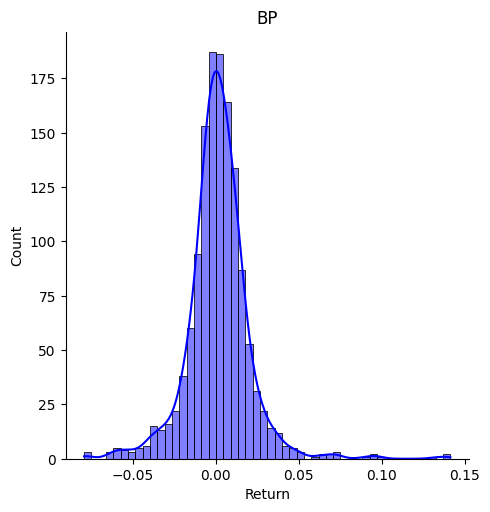

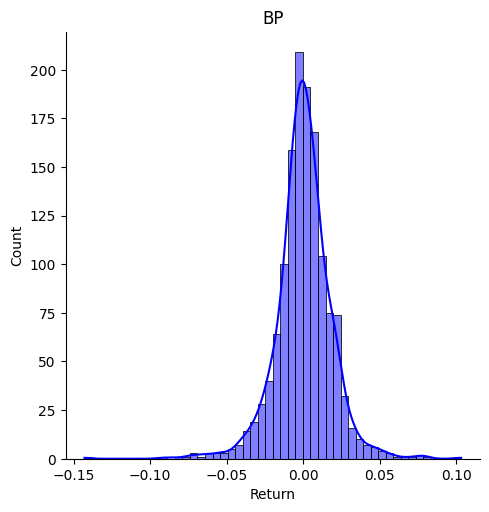

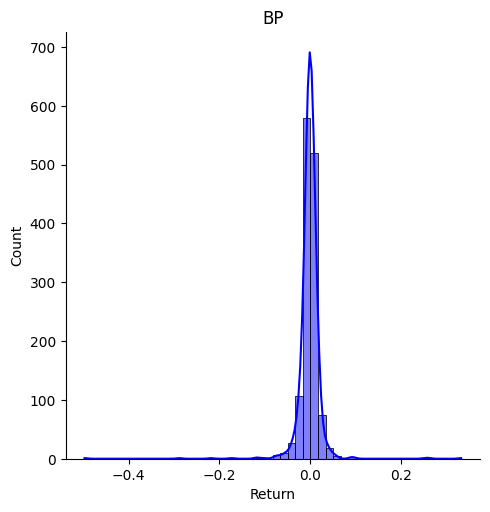

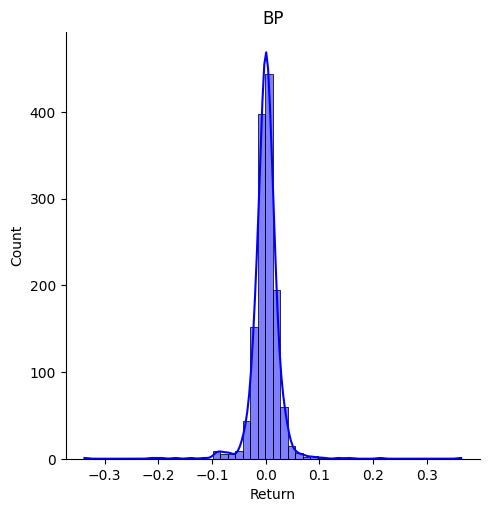

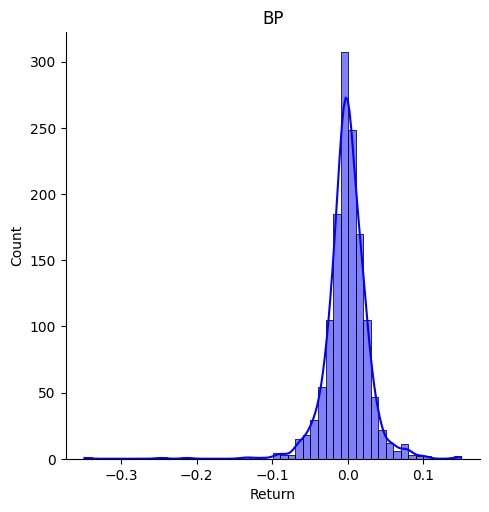

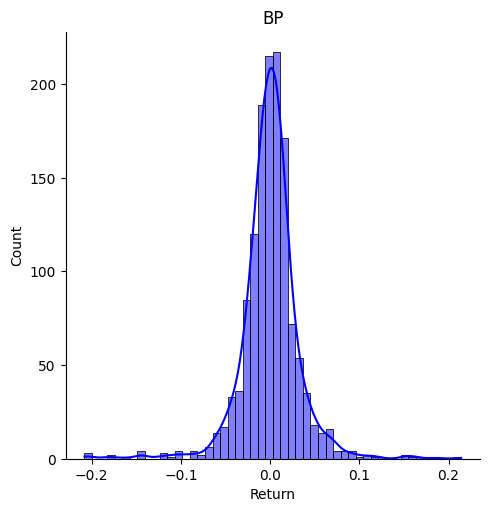

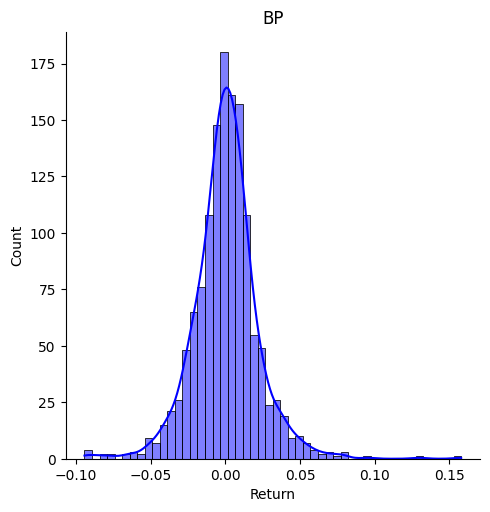

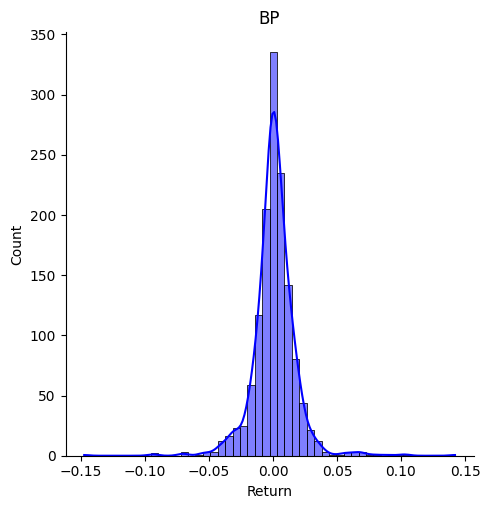

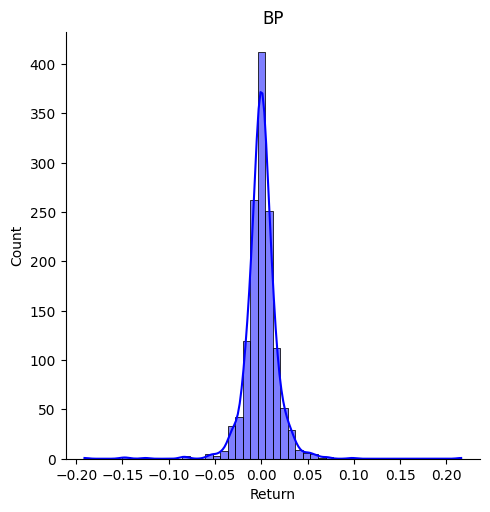

In [82]:
for i in company_list:
    companies[i]['Return'] = companies[i]['Adj Close'].pct_change()
    sns.displot(companies[i]['Return'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company)
    plt.show()

## Correlation between stock returns

In [47]:
# Create dataframe with stock returns
stock_returns = pd.DataFrame(data=np.array([data['Daily Returns'] for data in data_list]).T, columns=company_list)
stock_returns = stock_returns[1:]
stock_returns.head()

,MMM,AMZN,CAT,AI,AIR,AM,TWTR,RIO,MSFT,BP
1,0.002312,0.000405,0.015089,0.002931,0.014954,0.007849,0.011642,-0.010708,0.017551,0.002394
2,0.003204,0.010855,0.008423,0.006209,-0.003778,-0.006372,-0.012977,0.026528,-0.000411,0.004538
3,0.007091,0.017508,0.004422,-0.001452,0.013652,0.008194,-0.017862,-0.007029,0.004314,-0.004755
4,-0.003489,0.022615,0.003131,-0.006180,-0.007482,0.002474,0.000000,-0.007079,-0.000409,-0.002628
5,0.003628,-0.001603,0.004487,0.000732,-0.004523,0.022206,0.074514,-0.000210,-0.001841,-0.013653


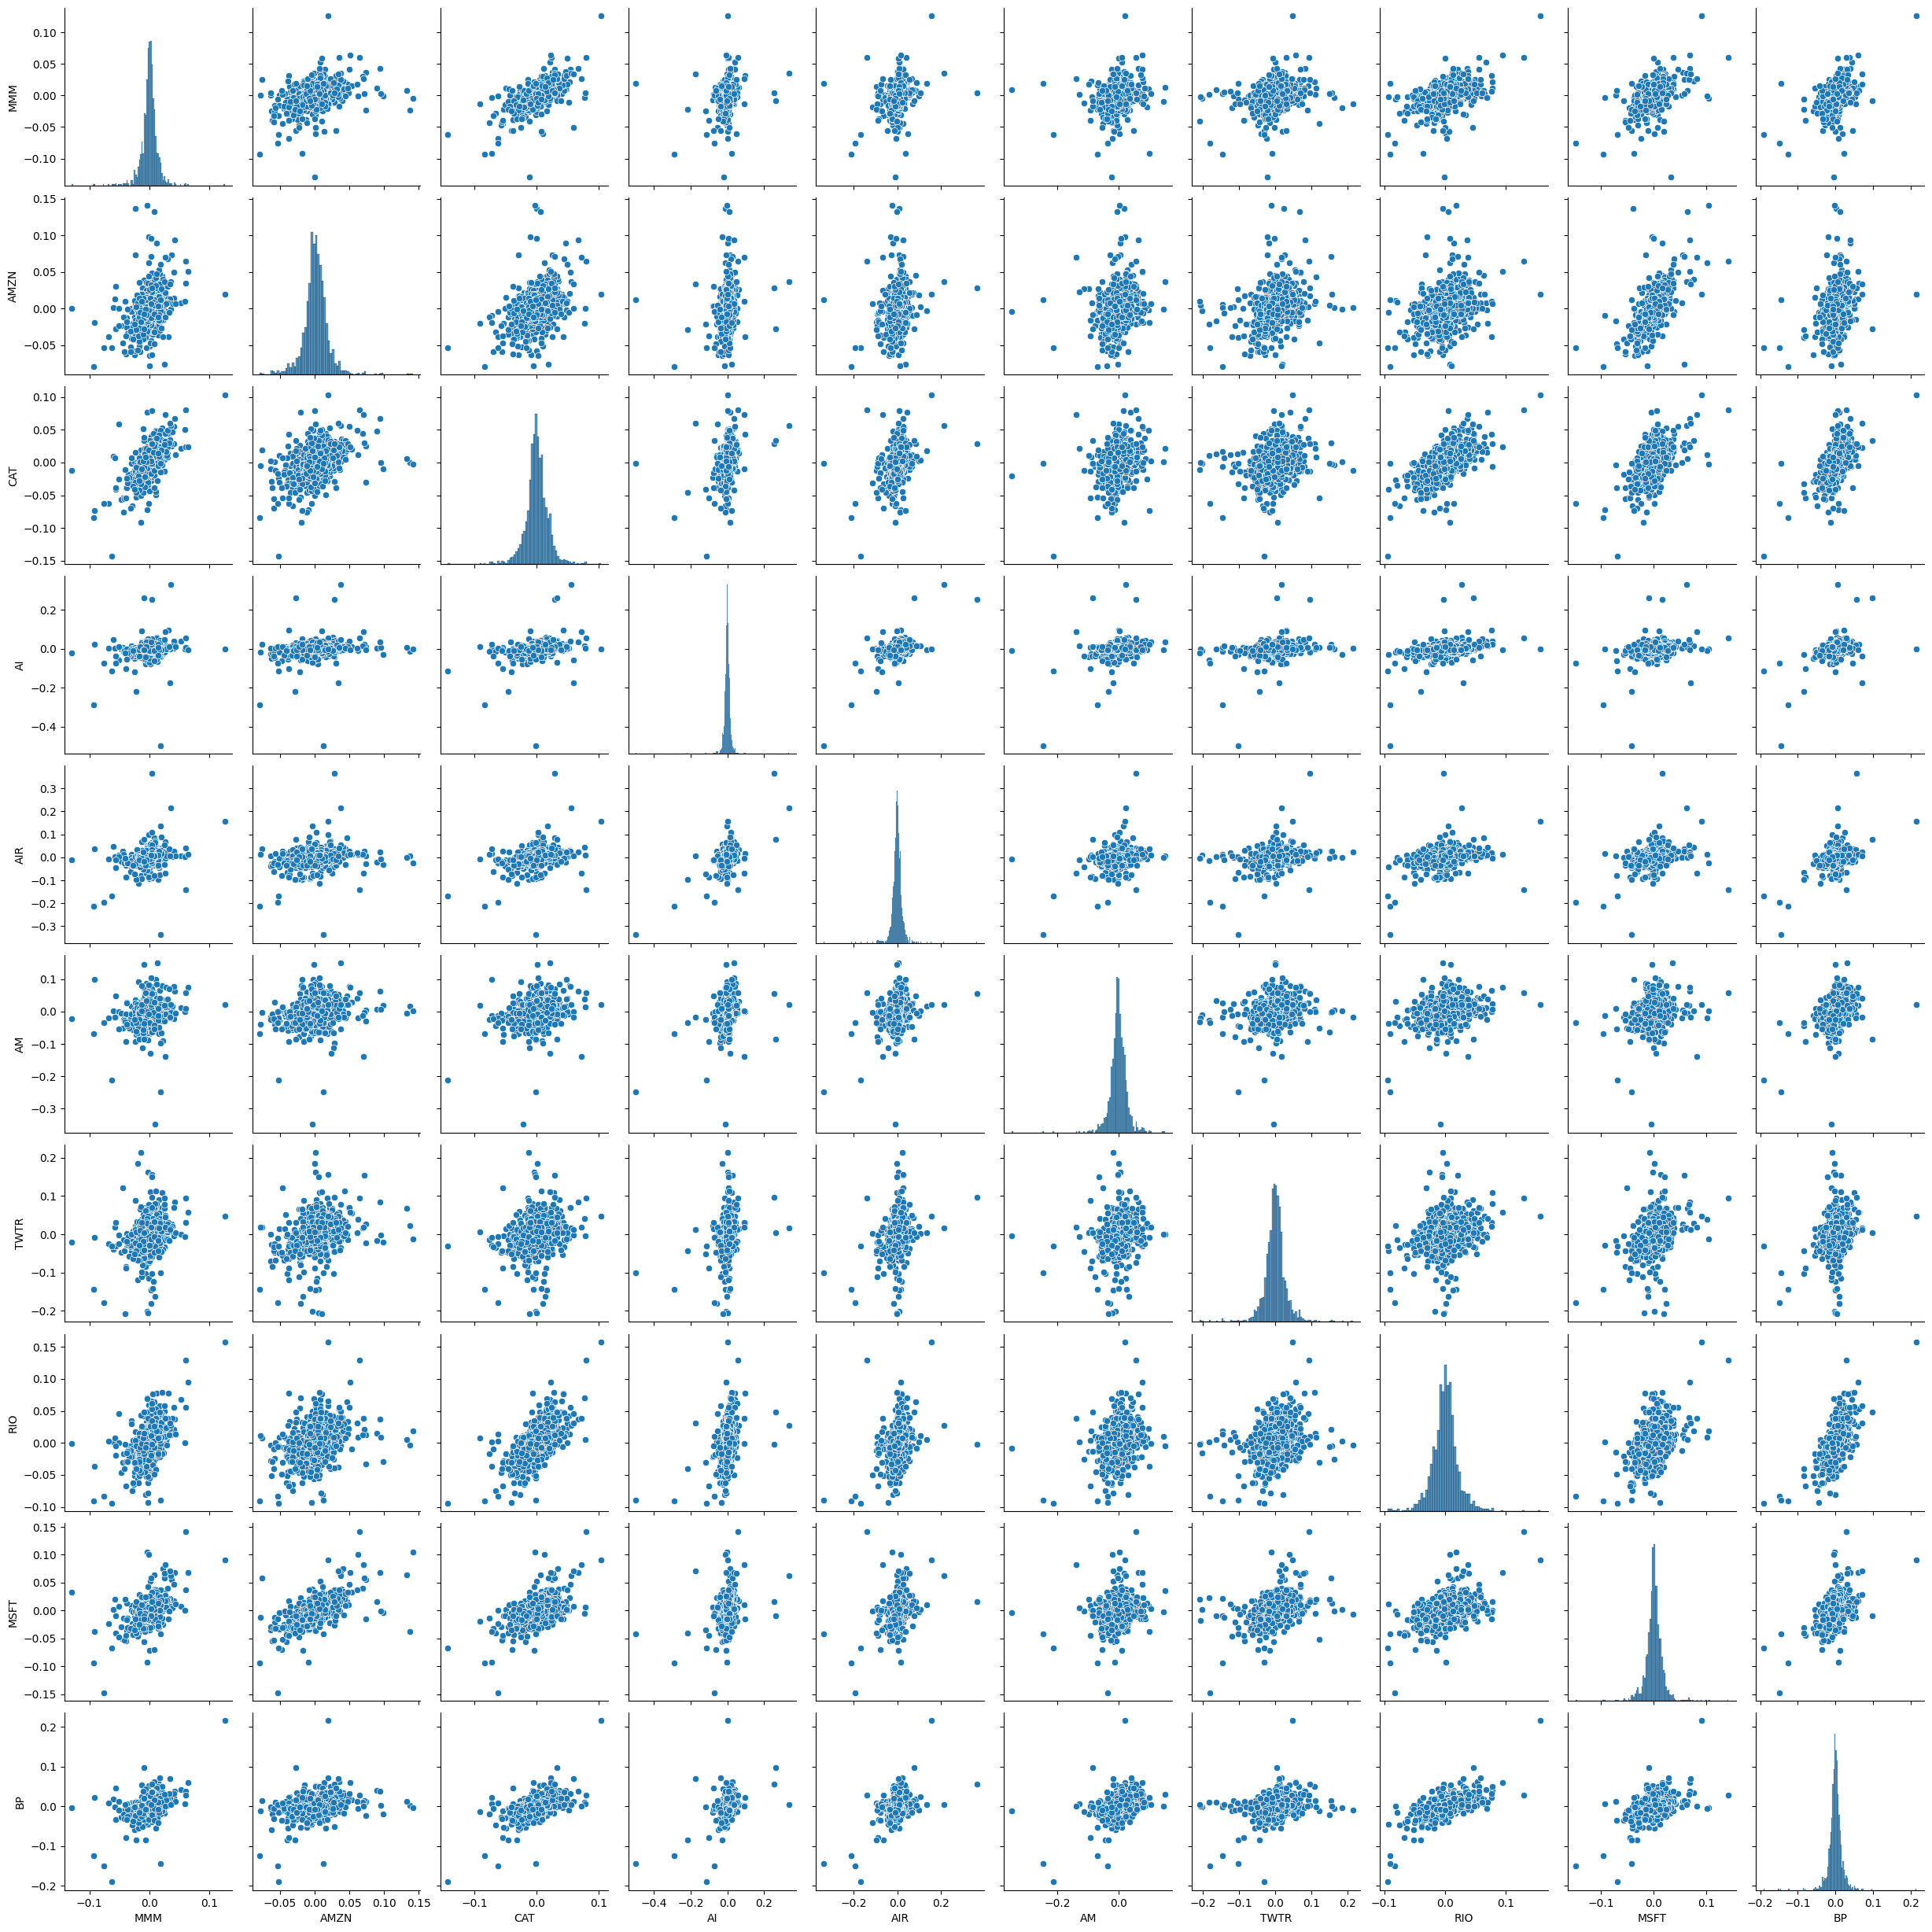

In [46]:
sns.pairplot(stock_returns.dropna())

In [49]:
corr

,MMM,AMZN,CAT,AI,AIR,AM,TWTR,RIO,MSFT,BP
MMM,1.000000,0.380678,0.623444,0.242071,0.325593,0.184966,0.247141,0.451217,0.537493,0.445654
AMZN,0.380678,1.000000,0.399927,0.200020,0.226130,0.204705,0.324853,0.302335,0.631492,0.299789
CAT,0.623444,0.399927,1.000000,0.322650,0.394159,0.270606,0.263569,0.623928,0.535637,0.564754
AI,0.242071,0.200020,0.322650,1.000000,0.587877,0.286650,0.257111,0.340371,0.298184,0.433965
AIR,0.325593,0.226130,0.394159,0.587877,1.000000,0.296712,0.277141,0.348121,0.344718,0.470586
AM,0.184966,0.204705,0.270606,0.286650,0.296712,1.000000,0.174068,0.287196,0.207741,0.403416
TWTR,0.247141,0.324853,0.263569,0.257111,0.277141,0.174068,1.000000,0.275120,0.375104,0.271788
RIO,0.451217,0.302335,0.623928,0.340371,0.348121,0.287196,0.275120,1.000000,0.437620,0.637194
MSFT,0.537493,0.631492,0.535637,0.298184,0.344718,0.207741,0.375104,0.437620,1.000000,0.461798
BP,0.445654,0.299789,0.564754,0.433965,0.470586,0.403416,0.271788,0.637194,0.461798,1.000000


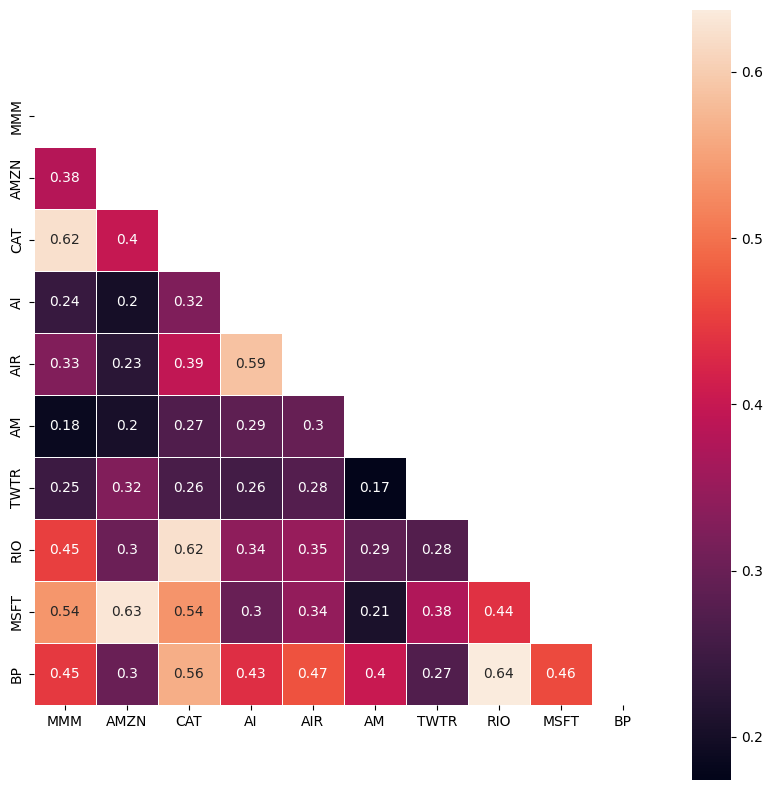

In [48]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()

In [ ]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

In [ ]:
draw_jointplot(stock_returns)

From graphics we have see positive correlation, but it is within [0.24, 0.55]. Amazon and Microsoft have the most correlated daily profits. Tesla and Twitter have the lowest correlation. 

## Portfolio strategy

Let's try to make an optimal portfolio of four stocks. Following the classical theory, it is necessary to minimize risk and maximize profitability. We will generate random ratios of stocks, calculate the risk and profitability of each portfolio according to the given formulas.

The expected return of the portfolio is the total expected return of the securities included in it, weighted taking into account their share in the portfolio. 

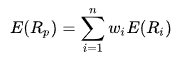

The basic formula for calculating risk is based on the relationship between the shares in the portfolio and the covariance associated with each of the securities in the portfolio.

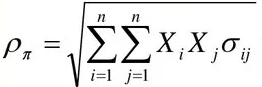

In [ ]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

In [ ]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [ ]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [ ]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

The Sharpe ratio is the ratio of return to risk.

In [ ]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [ ]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

## Try to predict price behavior with method Monte Carlo

In [ ]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [ ]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

### Twitter

In [ ]:
TWTR.tail()

In [ ]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TWTR'], sigma['TWTR'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Twitter')


In [ ]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Start price was 35.65, mean final price is 35.59. As we can see, final price is lower then start. Although the variance is small